In [1]:
from qiskit import*
from qiskit.visualization import plot_histogram

Deutch Jozsa Algorithm:To decide whether a function is  balanced or  imbalanced in single evaluation
This implementation is for 2 qubits.
The extra qubit in circuit is for phase kickback

In [12]:
qr=QuantumRegister(3)
cr=ClassicalRegister(3)
circuit=QuantumCircuit(qr,cr)

In [13]:
circuit.x(qr[2])
circuit.h(qr[0])
circuit.h(qr[1])
circuit.h(qr[2])
circuit.barrier()

In [14]:
c=1# assuming c=0 for balanced and c=1 for imbalanced

In [15]:
#Oracle definition
if c==1:
    circuit.i(qr[2])
else:
    circuit.cx(qr[0],qr[2])
    circuit.cx(qr[1],qr[2])
    #so on if more qubits


In [16]:
circuit.barrier()
circuit.h(qr[0])
circuit.h(qr[1])

In [17]:
circuit.measure(qr[0],cr[0])
circuit.measure(qr[1],cr[1])


In [10]:
circuit.draw()
#for balanecd function

┌───┐      ░            ░ ┌───┐┌─┐   
q0_0: ┤ H ├──────░───■────────░─┤ H ├┤M├───
      ├───┤      ░   │        ░ ├───┤└╥┘┌─┐
q0_1: ┤ H ├──────░───┼────■───░─┤ H ├─╫─┤M├
      ├───┤┌───┐ ░ ┌─┴─┐┌─┴─┐ ░ └───┘ ║ └╥┘
q0_2: ┤ X ├┤ H ├─░─┤ X ├┤ X ├─░───────╫──╫─
      └───┘└───┘ ░ └───┘└───┘ ░       ║  ║ 
c0: 3/════════════════════════════════╩══╩═
                                      0  1

{'011': 1024}


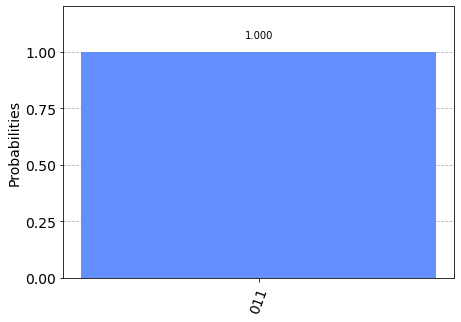

In [11]:

aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(circuit).result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)


In [18]:
circuit.draw()
#for imbalanecd function

┌───┐      ░       ░ ┌───┐┌─┐   
q1_0: ┤ H ├──────░───────░─┤ H ├┤M├───
      ├───┤      ░       ░ ├───┤└╥┘┌─┐
q1_1: ┤ H ├──────░───────░─┤ H ├─╫─┤M├
      ├───┤┌───┐ ░ ┌───┐ ░ └───┘ ║ └╥┘
q1_2: ┤ X ├┤ H ├─░─┤ I ├─░───────╫──╫─
      └───┘└───┘ ░ └───┘ ░       ║  ║ 
c1: 3/═══════════════════════════╩══╩═
                                 0  1

{'000': 1024}


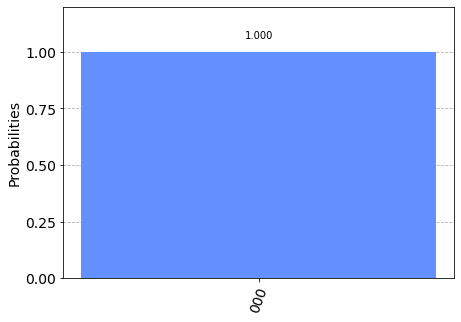

In [19]:

aer_sim = Aer.get_backend('aer_simulator')
result = aer_sim.run(circuit).result()
counts = result.get_counts(circuit)
print(counts)
plot_histogram(counts)